# plotting functions for supplementary figure 6
This figure shows the results of 2 3DFlex models trained on the covid spike monomer steered MD dataset. The panels are largely the same as figure 5 in the manunscript


In [9]:
# imports
import os
import gemmi
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# roodmus
from roodmus.analysis.utils import load_data
from roodmus.analysis.utils import IO
from roodmus.heterogeneity.plot_heterogeneous_reconstruction import plot_latent_space_scatter

# 3DFlex model with zdim = 1
This model's latent space must be visualised differently then the usual cases where zdim >= 2.


In [3]:
# data loading
project_dir = "/home/mjoosten1/projects/roodmus/data/6xm5_steered_Roodmus_2"
config_dir = os.path.join(project_dir, "mrc")
figures_dir = os.path.join(project_dir, "figures")
meta_file = os.path.join(project_dir, "cryoSPARC", "J526_passthrough_particles.cs")
jobtypes = {
    os.path.join(project_dir, "cryoSPARC", "J526_passthrough_particles.cs"): "3DFlex zdim=1"
}
latent_file = os.path.join(project_dir, "cryoSPARC", "J526_latents_019446.cs")
dt = 0.01 # ps interval between frames

particle_diameter = 100 # approximate particle diameter in Angstroms
ugraph_shape = (4000, 4000) # shape of the micrograph in pixels. Only needs to be given if the metadata file is a .star file
verbose = True
ignore_missing_files = True
enable_tqdm = True

analysis = load_data(meta_file, config_dir, particle_diameter, ugraph_shape=ugraph_shape, verbose=verbose, enable_tqdm=enable_tqdm, ignore_missing_files=ignore_missing_files) # creates the class
df_picked = pd.DataFrame(analysis.results_picking)
df_truth = pd.DataFrame(analysis.results_truth)
df_precision, df_picked = analysis.compute_precision(df_picked, df_truth, verbose=verbose)
print(f"mean precision: {df_precision['precision'].mean()}")
print(f"mean recall: {df_precision['recall'].mean()}")

latent_space, ndim = IO.get_latents_cs(latent_file)
print(f"latent space dimensionality: {ndim}")
print(latent_space.shape)
for i in range(ndim):
    df_picked["latent_{}".format(i)] = latent_space[:, i]
df_picked.tail()

loading metadata from /home/mjoosten1/projects/roodmus/data/6xm5_steered_Roodmus_2/cryoSPARC/J526_passthrough_particles.cs...
loaded metadata from /home/mjoosten1/projects/roodmus/data/6xm5_steered_Roodmus_2/cryoSPARC/J526_passthrough_particles.cs. determined file type: cs


Dictionaries now contain 213000 reconstructed particles
added 213000 particles from /home/mjoosten1/projects/roodmus/data/6xm5_steered_Roodmus_2/cryoSPARC/J526_passthrough_particles.cs


loading truth data: 100%|██████████| 799/799 [06:23<00:00,  2.08it/s, micrograph=000798.mrc]


Loaded ground-truth particle positions from config files
Dictionaries now contain 213000 particles and 199750 true particles
Added 199750 particles from /home/mjoosten1/projects/roodmus/data/6xm5_steered_Roodmus_2/mrc
For each micrograph, for each metadata file, compute the precision, recall and multiplicity
Speed of computation depends on the number of particles in the micrograph. progressbar is not accurate
Total number of groups to loop over: 799
Number of micgrographs: 799
Number of metadata files: 1
Starting loop over groups


computing precision: 100%|██████████| 799/799 [00:52<00:00, 15.14it/s, precision=0.988, recall=0.335, multiplicity=0.348]


time taken to compute precision: 53.362324476242065
mean precision: 0.8006149223089343
mean recall: 0.8079271937707457
latent space dimensionality: 1
(213000, 1)


,metadata_filename,ugraph_filename,position_x,position_y,euler_phi,euler_theta,euler_psi,ugraph_shape,defocusU,defocusV,class2D,TP,closest_dist,closest_particle,closest_pdb,closest_pdb_index,latent_0
212995,/home/mjoosten1/projects/roodmus/data/6xm5_ste...,000798.mrc,3116.0,2064.0,-0.925144,2.674026,0.604917,"[4000, 4000]",14764.269531,14764.269531,40,True,25.915456,198,/home/mjoosten1/projects/roodmus/data/6xm5_ste...,8155.0,0.506667
212996,/home/mjoosten1/projects/roodmus/data/6xm5_ste...,000798.mrc,3572.0,2696.0,0.490432,2.525035,-2.889620,"[4000, 4000]",14764.269531,14764.269531,28,True,17.216959,92,/home/mjoosten1/projects/roodmus/data/6xm5_ste...,3885.0,-0.506667
212997,/home/mjoosten1/projects/roodmus/data/6xm5_ste...,000798.mrc,3680.0,1124.0,2.343655,2.700262,2.166481,"[4000, 4000]",14764.269531,14764.269531,12,True,13.789591,209,/home/mjoosten1/projects/roodmus/data/6xm5_ste...,8376.0,0.570667
212998,/home/mjoosten1/projects/roodmus/data/6xm5_ste...,000798.mrc,3336.0,872.0,0.684857,2.917804,3.091443,"[4000, 4000]",14764.269531,14764.269531,14,True,44.860959,20,/home/mjoosten1/projects/roodmus/data/6xm5_ste...,1087.0,-0.709333
212999,/home/mjoosten1/projects/roodmus/data/6xm5_ste...,000798.mrc,560.0,520.0,-0.919896,2.510094,-0.627793,"[4000, 4000]",14764.269531,14764.269531,40,True,22.252534,131,/home/mjoosten1/projects/roodmus/data/6xm5_ste...,5217.0,0.496000


## panel A
plotting the 1-dimensional latent space as a histogram

saved figure to: /home/mjoosten1/projects/roodmus/data/6xm5_steered_Roodmus_2/figures/histogram_z0_J526_latents_019446.cs.pdf


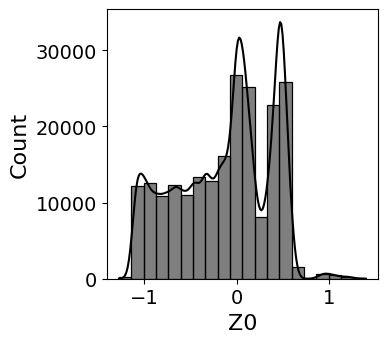

In [4]:
fig, ax = plt.subplots(figsize=(3.5, 3.5))
sns.histplot(
    data=df_picked,
    x="latent_0",
    color="black",
    kde=True,
    bins=20,
    ax=ax,
)
ax.set_xlabel("Z0", fontsize=16)
ax.set_ylabel("Count", fontsize=16)
ax.tick_params(axis="both", which="major", labelsize=14)

outfilename = os.path.join(figures_dir, f"histogram_z0_{os.path.basename(latent_file)}.pdf")
# fig.savefig(outfilename, bbox_inches="tight")
print(f"saved figure to: {outfilename}")


## panel B
kdeplot of the 1-dimensional latent space versus the time in the MD trajectory of each particle

saved figure to: /home/mjoosten1/projects/roodmus/data/6xm5_steered_Roodmus_2/figures/z0_vs_time_J526_latents_019446.cs.pdf


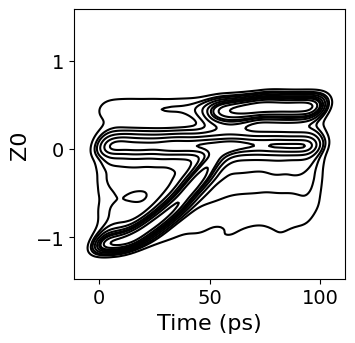

In [6]:
df_picked["time"] = df_picked["closest_pdb_index"].apply(lambda x: x * dt)
fig, ax = plt.subplots(figsize=(3.5, 3.5))
sns.kdeplot(
    data=df_picked,
    x="time",
    y="latent_0",
    color="black",
    fill=False,
    ax=ax,
    thresh=0.05,
)
ax.set_xlabel("Time (ps)", fontsize=16)
ax.set_ylabel("Z0", fontsize=16)
ax.tick_params(axis="both", which="major", labelsize=14)

outfilename = os.path.join(figures_dir, f"z0_vs_time_{os.path.basename(latent_file)}.pdf")
# fig.savefig(outfilename, bbox_inches="tight")
print(f"saved figure to: {outfilename}")


# 3DFlex model with zdim = 2

In [7]:
# data loading
project_dir = "/home/mjoosten1/projects/roodmus/data/6xm5_steered_Roodmus_2"
config_dir = os.path.join(project_dir, "mrc")
figures_dir = os.path.join(project_dir, "figures")
meta_file = os.path.join(project_dir, "cryoSPARC", "J577_passthrough_particles.cs")
jobtypes = {
    os.path.join(project_dir, "cryoSPARC", "J577_passthrough_particles.cs"): "3DFlex zdim=2"
}
latent_file = os.path.join(project_dir, "cryoSPARC", "J577_latents_022224.cs")
dt = 0.01 # ps interval between frames

particle_diameter = 100 # approximate particle diameter in Angstroms
ugraph_shape = (4000, 4000) # shape of the micrograph in pixels. Only needs to be given if the metadata file is a .star file
verbose = True
ignore_missing_files = True
enable_tqdm = True

analysis = load_data(meta_file, config_dir, particle_diameter, ugraph_shape=ugraph_shape, verbose=verbose, enable_tqdm=enable_tqdm, ignore_missing_files=ignore_missing_files) # creates the class
df_picked = pd.DataFrame(analysis.results_picking)
df_truth = pd.DataFrame(analysis.results_truth)
df_precision, df_picked = analysis.compute_precision(df_picked, df_truth, verbose=verbose)
print(f"mean precision: {df_precision['precision'].mean()}")
print(f"mean recall: {df_precision['recall'].mean()}")

latent_space, ndim = IO.get_latents_cs(latent_file)
print(f"latent space dimensionality: {ndim}")
print(latent_space.shape)
for i in range(ndim):
    df_picked["latent_{}".format(i)] = latent_space[:, i]
df_picked.tail()

loading metadata from /home/mjoosten1/projects/roodmus/data/6xm5_steered_Roodmus_2/cryoSPARC/J577_passthrough_particles.cs...
loaded metadata from /home/mjoosten1/projects/roodmus/data/6xm5_steered_Roodmus_2/cryoSPARC/J577_passthrough_particles.cs. determined file type: cs


Dictionaries now contain 213000 reconstructed particles
added 213000 particles from /home/mjoosten1/projects/roodmus/data/6xm5_steered_Roodmus_2/cryoSPARC/J577_passthrough_particles.cs


loading truth data: 100%|██████████| 799/799 [06:11<00:00,  2.15it/s, micrograph=000798.mrc]


Loaded ground-truth particle positions from config files
Dictionaries now contain 213000 particles and 199750 true particles
Added 199750 particles from /home/mjoosten1/projects/roodmus/data/6xm5_steered_Roodmus_2/mrc
For each micrograph, for each metadata file, compute the precision, recall and multiplicity
Speed of computation depends on the number of particles in the micrograph. progressbar is not accurate
Total number of groups to loop over: 799
Number of micgrographs: 799
Number of metadata files: 1
Starting loop over groups


computing precision: 100%|██████████| 799/799 [00:56<00:00, 14.06it/s, precision=0.988, recall=0.335, multiplicity=0.348]


time taken to compute precision: 57.3620548248291
mean precision: 0.8006149223089343
mean recall: 0.8079271937707457
latent space dimensionality: 2
(213000, 2)


,metadata_filename,ugraph_filename,position_x,position_y,euler_phi,euler_theta,euler_psi,ugraph_shape,defocusU,defocusV,class2D,TP,closest_dist,closest_particle,closest_pdb,closest_pdb_index,latent_0,latent_1
212995,/home/mjoosten1/projects/roodmus/data/6xm5_ste...,000798.mrc,3116.0,2064.0,-0.925144,2.674026,0.604917,"[4000, 4000]",14764.269531,14764.269531,40,True,25.915456,198,/home/mjoosten1/projects/roodmus/data/6xm5_ste...,8155.0,0.528000,-0.026667
212996,/home/mjoosten1/projects/roodmus/data/6xm5_ste...,000798.mrc,3572.0,2696.0,0.490432,2.525035,-2.889620,"[4000, 4000]",14764.269531,14764.269531,28,True,17.216959,92,/home/mjoosten1/projects/roodmus/data/6xm5_ste...,3885.0,-0.453333,-0.613333
212997,/home/mjoosten1/projects/roodmus/data/6xm5_ste...,000798.mrc,3680.0,1124.0,2.343655,2.700262,2.166481,"[4000, 4000]",14764.269531,14764.269531,12,True,13.789591,209,/home/mjoosten1/projects/roodmus/data/6xm5_ste...,8376.0,0.570667,-0.058667
212998,/home/mjoosten1/projects/roodmus/data/6xm5_ste...,000798.mrc,3336.0,872.0,0.684857,2.917804,3.091443,"[4000, 4000]",14764.269531,14764.269531,14,True,44.860959,20,/home/mjoosten1/projects/roodmus/data/6xm5_ste...,1087.0,0.101333,-0.624000
212999,/home/mjoosten1/projects/roodmus/data/6xm5_ste...,000798.mrc,560.0,520.0,-0.919896,2.510094,-0.627793,"[4000, 4000]",14764.269531,14764.269531,40,True,22.252534,131,/home/mjoosten1/projects/roodmus/data/6xm5_ste...,5217.0,-0.432000,-0.496000


## panel C
scatter plot of the 2-dimensional latent space

saved figure to: /home/mjoosten1/projects/roodmus/data/6xm5_steered_Roodmus_2/figures/J577_latents_022224.cs_0_1.png


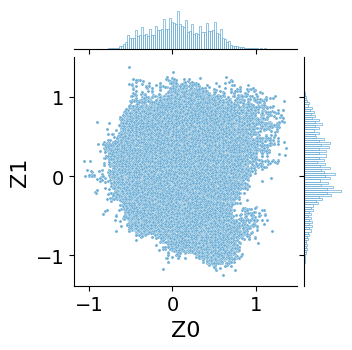

In [11]:
# latent space scatter plot
dim1=0
dim2=1

grid = plot_latent_space_scatter(
    df_picked,
    dim_1=dim1,
    dim_2=dim2,
    pca=False
)
grid.set_axis_labels(f"Z{dim1}", f"Z{dim2}", fontsize=16)
grid.fig.get_axes()[0].tick_params(axis="both", which="major", labelsize=14)

outfilename = os.path.join(figures_dir, f"{os.path.basename(latent_file)}_{dim1}_{dim2}.png")
# grid.fig.savefig(outfilename, dpi=600, bbox_inches="tight")
print(f"saved figure to: {outfilename}")

## panel D
scatterplot of the 2-dimensional latent space with the time in the MD trajectory of each particle as the color

saved figure to: /home/mjoosten1/projects/roodmus/data/6xm5_steered_Roodmus_2/figures/J577_latents_022224.cs_latent_space_scatter_colored_by_closest_pdb_index_pca.pdf


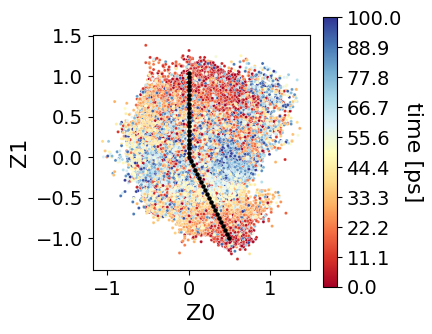

In [12]:
# latent space scatter plot, coloured by ground truth frames
dim1=0
dim2=1

fig, ax = plot_latent_space_scatter(
    df_picked,
    dim_1=dim1,
    dim_2=dim2,
    color_by="closest_pdb_index",
    palette="RdYlBu",
    pca=False,
)
# remove legend and add colorbar for the closest_pdb_index
ax.legend_.remove()
S_m = plt.cm.ScalarMappable(cmap="RdYlBu")
S_m.set_array(df_picked["closest_pdb_index"])
cbar = plt.colorbar(S_m)
cbar.set_label("time [ps]", rotation=270, labelpad=15, fontsize=16) # time in ps
# change the tick labels on the colorbar to go from 0 to 10 us
cbar.set_ticks(np.linspace(1, df_picked["closest_pdb_index"].max(), 10))
xticklabels = [np.round(r, 1) for r in np.linspace(1, df_picked["closest_pdb_index"].max(), 10)*dt]
cbar.set_ticklabels(xticklabels, fontsize=14)
ax.set_xlabel(f"Z{dim1}", fontsize=16)
ax.set_ylabel(f"Z{dim2}", fontsize=16)
ax.tick_params(labelsize=14)

# add trajectory to the plot
trajectory_file = os.path.join(project_dir, "cryoSPARC", "J577_custom_path_2.csv")
trajectory = np.loadtxt(trajectory_file, delimiter=",", skiprows=1)

ax.scatter(trajectory[:, 0], trajectory[:, 1], s=5, c="black", zorder=10)
ax.plot(trajectory[:, 0], trajectory[:, 1], c="black", zorder=10, linewidth=0.5)
ax.set_aspect("equal")

outfilename = os.path.join(figures_dir, f"{os.path.basename(latent_file)}_latent_space_scatter_colored_by_closest_pdb_index_pca.pdf")
# fig.savefig(outfilename, bbox_inches="tight")
print(f"saved figure to: {outfilename}")


## panel E
plotting the correlation between the MD trajectory and the 1-dimensional latent space


saved figure to: /home/mjoosten1/projects/roodmus/data/6xm5_steered_Roodmus_2/figures/J526_latents_019446.cs_correlation_matrix.pdf


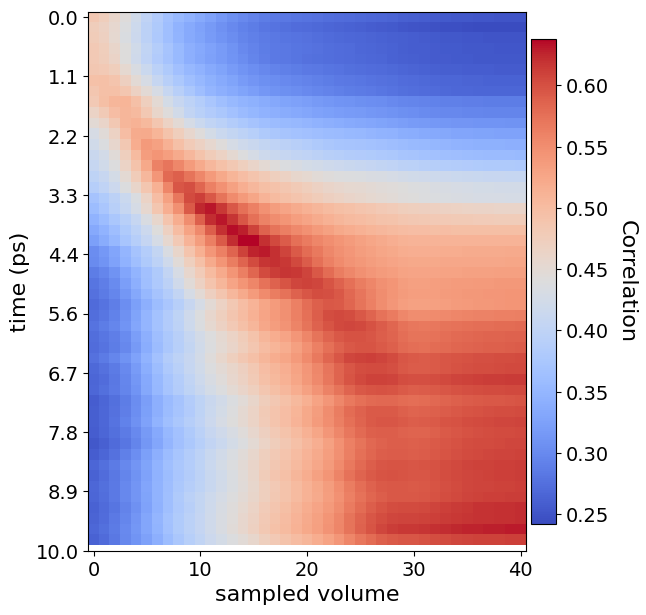

In [13]:
# plot the correlation matrix
project_dir = "/home/mjoosten1/projects/roodmus/data/6xm5_steered_Roodmus_2"
figures_dir = os.path.join(project_dir, "figures")
correlation_matrix_file = os.path.join(project_dir, "cryosparc_P51_J527_series_000", "correlation_matrix.npy")
correlation_matrix = np.load(correlation_matrix_file)
latent_file = os.path.join(project_dir, "cryoSPARC", "J526_latents_019446.cs")

frames = correlation_matrix.shape[0]

fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(correlation_matrix, cmap="coolwarm")
yticks = np.linspace(0, frames, 10)
yticklabels = np.round(np.linspace(0, 10, 10, dtype=float), 1)
ax.set_yticks(yticks)
ax.set_yticklabels(yticklabels)
ax.set_ylabel("time (ps)", fontsize=16)
ax.set_xlabel("sampled volume", fontsize=16)
cbar = ax.figure.colorbar(ax.get_images()[0], ax=ax, orientation="vertical", pad=0.01, shrink=0.9)
cbar.ax.tick_params(labelsize=14)
cbar.ax.set_ylabel("Correlation", fontsize=16, rotation=270, labelpad=20)
ax.tick_params(axis="both", which="major", labelsize=14)

outfilename = os.path.join(figures_dir, f"{os.path.basename(latent_file)}_correlation_matrix.pdf")
# fig.savefig(outfilename, bbox_inches="tight")
print(f"saved figure to: {outfilename}")


## panel F
plotting the correlation between the MD trajectory and the 2-dimensional latent space

saved figure to: /home/mjoosten1/projects/roodmus/data/6xm5_steered_Roodmus_2/figures/J577_latents_022224.cs_correlation_matrix.pdf


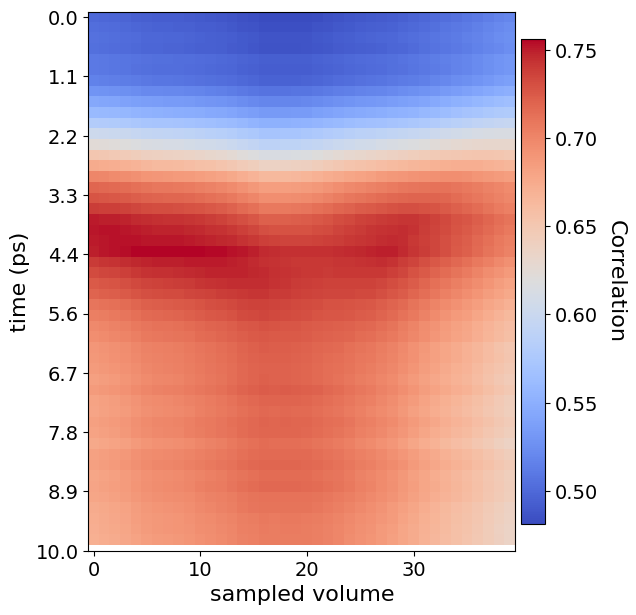

In [14]:
# plot the correlation matrix
project_dir = "/home/mjoosten1/projects/roodmus/data/6xm5_steered_Roodmus_2"
figures_dir = os.path.join(project_dir, "figures")
correlation_matrix_file = os.path.join(project_dir, "cryosparc_P51_J641_series_000", "correlation_matrix.npy")
correlation_matrix = np.load(correlation_matrix_file)
latent_file = os.path.join(project_dir, "cryoSPARC", "J577_latents_022224.cs")

frames = correlation_matrix.shape[0]

fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(correlation_matrix, cmap="coolwarm")
yticks = np.linspace(0, frames, 10)
yticklabels = np.round(np.linspace(0, 10, 10, dtype=float), 1)
ax.set_yticks(yticks)
ax.set_yticklabels(yticklabels)
ax.set_ylabel("time (ps)", fontsize=16)
ax.set_xlabel("sampled volume", fontsize=16)
cbar = ax.figure.colorbar(ax.get_images()[0], ax=ax, orientation="vertical", pad=0.01, shrink=0.9)
cbar.ax.tick_params(labelsize=14)
cbar.ax.set_ylabel("Correlation", fontsize=16, rotation=270, labelpad=20)
ax.tick_params(axis="both", which="major", labelsize=14)

outfilename = os.path.join(figures_dir, f"{os.path.basename(latent_file)}_correlation_matrix.pdf")
# fig.savefig(outfilename, bbox_inches="tight")
print(f"saved figure to: {outfilename}")


## in-text
compute and print the total mass of the first conformation


In [15]:
pdb_file = "/home/mjoosten1/projects/roodmus/data/6xm5_steered_Roodmus_1/pdb/conformation_000000.pdb"
pdb_gemmi = gemmi.read_structure(pdb_file)
mass = 0
for chn in pdb_gemmi[0]:
    for res in chn:
        for atm in res:
            mass += atm.element.weight

print(f"total mass: {mass/1000} kDa")
print(f"mass of entire protein: {mass/1000*3} kDa")


total mass: 116.87687187998615 kDa
mass of entire protein: 350.6306156399585 kDa
